In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')


- Question 1: (10 points) For visualization purpose, generate heat maps of
Reward function 1 and Reward function 2. For the heat maps, make sure you
display the coloring scale. You will have 2 plots for this question

Text(0.5,1,'Heat map of reward function 1')

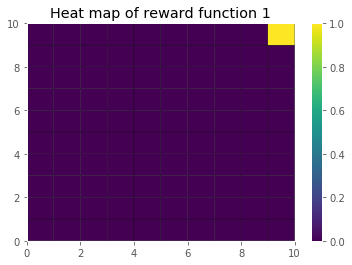

In [3]:
x = np.arange(11)
y = np.arange(11)
X, Y = np.meshgrid(x, y)

R1=[[0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,1],
  ]
plt.pcolor(X,Y,R1,edgecolors='k')
plt.colorbar()
plt.title('Heat map of reward function 1')

Text(0.5,1,'Heat map of reward function 2')

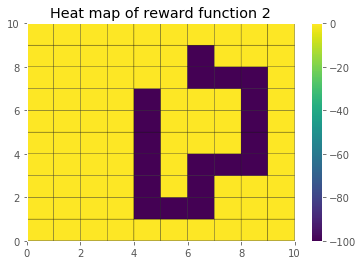

In [4]:
R2=[[0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,-100,-100,-100,0,0,0],
   [0,0,0,0,-100,0,-100,0,0,0],
   [0,0,0,0,-100,0,-100,-100,-100,0],
   [0,0,0,0,-100,0,0,0,-100,0],
   [0,0,0,0,-100,0,0,0,-100,0],
   [0,0,0,0,-100,0,0,0,-100,0],
   [0,0,0,0,0,0,-100,-100,-100,0],
   [0,0,0,0,0,0,-100,0,0,0],
   [0,0,0,0,0,0,0,0,0,0],
  ]
plt.pcolor(X,Y,R2,edgecolors='k')
plt.colorbar()
plt.title('Heat map of reward function 2')

- Question 2: (40 points) Create the environment of the agent using the information provided in section 2. To be specific, create the MDP by setting up the state-space, action set, transition probabilities, discount factor, and reward function. For creating the environment, use the following set of parameters:
 Number of states = 100 (state space is a 10 by 10 square grid as displayed
in figure 1)
 Number of actions = 4 (set of possible actions is displayed in figure 2)
 w = 0.1
 Discount factor = 0.8
 Reward function 1
After you have created the environment, then write an optimal state-value func-
tion that takes as input the environment of the agent and outputs the optimal
value of each state in the grid. For the optimal state-value function, you have
to implement the Initialization (lines 2-4) and Estimation (lines 5-13) steps of
the Value Iteration algorithm. For the estimation step, use epsilon = 0.01. For visualization purpose, you should generate a figure similar to that of figure 1 but
with the number of state replaced by the optimal value of that state. In this
question, you should have 1 plot.

- Question 3: (5 points) Generate a heat map of the optimal state values across
the 2-D grid. For generating the heat map, you can use the same function pro-
vided in the hint earlier (see the hint after question 1).

Text(0.5,1,'Heat map of optimal state values with reward 1')

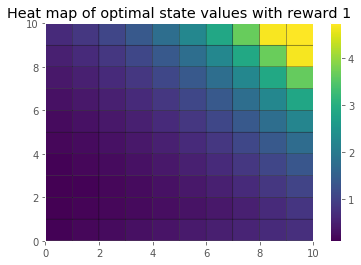

In [85]:
MaxState=100;
MaxAction=4;
Inf=10000000

global V
V=[0 for i in range(0,MaxState)];#Initialize state-value array

def judge_position(x,y):
    Corner_state=[0,9,90,99]
    Edge_state=[1,2,3,4,5,6,7,8,
               91,92,93,94,95,96,97,98,
               10,20,30,40,50,60,70,80,
               19,29,39,49,59,69,79,89]
    idx=x+10*y
    if idx in Corner_state:
        return 0
    elif idx in Edge_state:
        return 1
    else:
        return 2

#Transition probability


def Trans_prob(s,a,t):
    omega=0.1;
    
    #convert the action 'i' to the action vector: (x_move[i],y_move[i])
    #up:0, right: 1, down:2, left:3
    x_move=[-1,0,1,0]
    y_move=[0,1,0,-1]
    prob=0;
    
    #determine whether s and t are adjacent
    diff=s-t;
    if diff!=1 and diff!=-1 and diff!=0 and diff!=10 and diff!=-10:
        return prob
    
    #Compute the coordinate
    xs,ys=s%10,s//10
    xt,yt=t%10,t//10   
    
    position_state=judge_position(xs,ys);#position_state:determine whether it is at corner(0), edge(1) or interior(2)
    
    if position_state==0:       
        if xs+x_move[a]<0 or xs+x_move[a]>9 or ys+y_move[a]<0 or ys+y_move[a]>9: #move off the grid
            if t==s:
                prob=1-omega+omega/4+omega/4
            else:
                prob=omega/4;
        else:                                                     #stay in the grid
            if xs+x_move[a]==xt and ys+y_move[a]==yt:
                prob=1-omega+omega/4
            elif t==s:
                prob=omega/4+omega/4
            else:
                prob=omega/4
    elif position_state==1:
        if xs+x_move[a]<0 or xs+x_move[a]>9 or ys+y_move[a]<0 or ys+y_move[a]>9: #move off the grid
            if t==s:
                prob=1-omega+omega/4
            else:
                prob=omega/4;
        else:                                                     #stay in the grid
            if xs+x_move[a]==xt and ys+y_move[a]==yt:
                prob=1-omega+omega/4
            else:
                prob=omega/4
    else:
        if xs+x_move[a]==xt and ys+y_move[a]==yt:
            prob=1-omega+omega/4
        elif t != s:
            prob=omega/4
    return prob
           
def Expt_Value(s,act,R):
    global V
    gamma=0.8
    mov=[-10,-1,0,1,10]
    y=0
    
    for i in mov:
        t=s+i
        if t>=0 and t<=99:
            xt,yt=t%10,t//10 
            y+=Trans_prob(s,act,t)*(R[xt][yt]+gamma*V[t])

#     for t in range(0,MaxState):
#         xt,yt=t%10,t//10
#         y+=Trans_prob(s,act,t)*(R1[xt][yt]+gamma*V[t])
    return y
        
        

def State_Value_function(R):
    global V
    epsilon=0.01
    
    delta=Inf
    while delta>epsilon:
        delta=0
        for s in range(0,MaxState):
            v=V[s]
            for i in range(0,MaxAction):
                temp=Expt_Value(s,i,R);
#                 print(temp)
                V[s]=max(V[s],temp)
            delta=max(delta,abs(v-V[s]))
#         print(delta)

State_Value_function(R1) 


grid_V=[[0 for col in range(0,10)] for row in range(0,10)];

for i in range(0,10):
    for j in range(0,10):
        idx=i+10*j
        grid_V[i][j]=V[idx]

# print(grid_V)
plt.pcolor(X,Y,grid_V,edgecolors='k')
plt.colorbar()
plt.title('Heat map of optimal state values with reward 1')

# temp_prob=Trans_prob(8,3,8)
# print(temp_prob)
# for i in range(0,10):
#     for j in range(0,10):
#         idx=i+10*j
#         print(V[idx],end=' ')
#     print('\n')

- Question 4: (15 points) Explain the distribution of the optimal state values
across the 2-D grid. (Hint: Use the figure generated in question 3 to explain)

In [66]:
print("The distribution of the optimal values are symmetric with respect to the diagonal.")

The distribution of the optimal values are symmetric with respect to the diagonal.


- Question 5: (30 points) Implement the computation step of the value iteration
algorithm (lines 14-17) to compute the optimal policy of the agent navigating
the 2-D state-space. For visualization purpose, you should generate a figure
similar to that of figure 1 but with the number of state replaced by the optimal
action at that state. The optimal actions should be displayed using arrows.
Does the optimal policy of the agent match your intuition? Please provide a
brief explanation. Is it possible for the agent to compute the optimal action to
take at each state by observing the optimal values of it's neighboring states? In
this question, you should have 1 plot.

Text(0.5,1,'Heat map of optimal policy with reward 1')

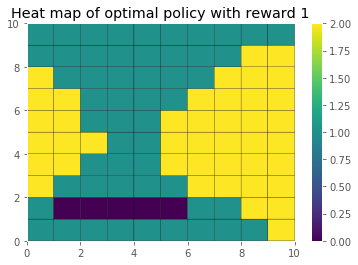

In [86]:
global PI

PI=[0 for col in range(0,MaxState)]
for s in range(0,MaxState):
    temp=-100000;
    for i in range(0,MaxAction):
        val=Expt_Value(s,i,R1)
        if val>temp:
            temp=val
            PI[s]=i
# print(PI)
grid_PI=[[0 for col in range(0,10)] for row in range(0,10)];

for i in range(0,10):
    for j in range(0,10):
        idx=i+10*j
        grid_PI[i][j]=PI[idx]

# print(grid_V)
plt.pcolor(X,Y,grid_PI,edgecolors='k')
plt.colorbar()
plt.title('Heat map of optimal policy with reward 1')
    

Text(0.5,1,'Heat map of optimal state values with reward 2')

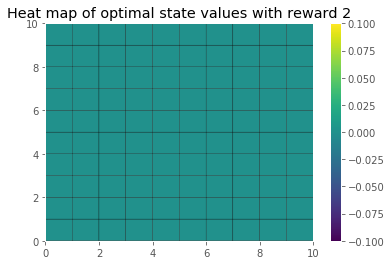

In [87]:
V=[0 for i in range(0,MaxState)];#Initialize state-value array
State_Value_function(R2)
grid_V=[[0 for col in range(0,10)] for row in range(0,10)];

for i in range(0,10):
    for j in range(0,10):
        idx=i+10*j
        grid_V[i][j]=V[idx]

# print(grid_V)
plt.pcolor(X,Y,grid_V,edgecolors='k')
plt.colorbar()
plt.title('Heat map of optimal state values with reward 2')

Text(0.5,1,'Heat map of optimal policy with reward 2')

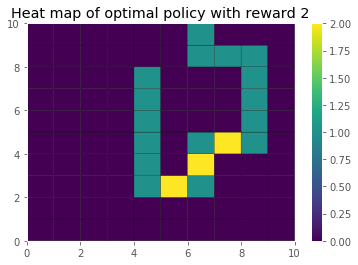

In [88]:
PI=[0 for col in range(0,MaxState)]
for s in range(0,MaxState):
    temp=-100000;
    for i in range(0,MaxAction):
        val=Expt_Value(s,i,R2)
        if val>temp:
            temp=val
            PI[s]=i
# print(PI)
grid_PI=[[0 for col in range(0,10)] for row in range(0,10)];

for i in range(0,10):
    for j in range(0,10):
        idx=i+10*j
        grid_PI[i][j]=PI[idx]

# print(grid_V)
plt.pcolor(X,Y,grid_PI,edgecolors='k')
plt.colorbar()
plt.title('Heat map of optimal policy with reward 2')